# Apple iOS Mobile Applications Data Exploration
### Budhajit  Roy Chanamthabam

## Preliminary Wrangling

With the ever increasing uses of Mobile devices, the demand and competition for mobile applications have tremendously increased. 

This document explores a dataset containing informations of around 7200 Apple iOS mobile application details that includes ratings given by the users and other related features and qualities.

Dimensions of the data set: 7197 rows and 16 columns.

Features:

    "id" : App ID
    "track_name": App Name
    "size_bytes": Size (in Bytes)
    "currency": Currency Type
    "price": Price amount
    "rating_count_tot": User Rating counts (for all versions)
    "rating_count_ver": User Rating counts (for current version)
    "user_rating" : Average User Rating value (for all versions)
    "user_rating_ver": Average User Rating value (for current version)
    "ver" : Latest version code
    "cont_rating": Content Rating
    "prime_genre": Primary Genre
    "sup_devices.num": Number of supporting devices
    "ipadSc_urls.num": Number of screenshots showed for display
    "lang.num": Number of supported languages
    "vpp_lic": Vpp Device Based Licensing Enabled

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
sb.set()

%matplotlib inline

In [2]:
#Loading the Dataset
appleStore = pd.read_csv('AppleStore.csv')

### Data Wrangling and Cleaning

In [3]:
# check the first five data values in the dataset
appleStore.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [4]:
# check the types and nature of the columns in the dataset
appleStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 955.9+ KB


In [5]:
# check the statistics of the numerical data columns
appleStore.describe()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [6]:
# checking for duplicated apps
appleStore.id.duplicated().sum()

0

In [7]:
# check if currency value is USD only..
appleStore.currency.value_counts()

USD    7197
Name: currency, dtype: int64

In [8]:
# this vpp_lic data doesnt seem to be related to the user rating
appleStore.vpp_lic.value_counts()

1    7147
0      50
Name: vpp_lic, dtype: int64

In [9]:
#check the unique values count cont_rating column
appleStore.cont_rating.value_counts()

4+     4433
12+    1155
9+      987
17+     622
Name: cont_rating, dtype: int64

In [10]:
# check the unique values count prime_genre column
appleStore.prime_genre.value_counts()

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

In [11]:
#check if there are any apps with non zero user_rating values but 0 rating_count_tot
appleStore.query('rating_count_tot == 0 and user_rating != 0')['id'].count()

0

In [12]:
# and similarly check if there are any apps with non zero user_rating_ver values but 0 rating_count_ver
appleStore.query('rating_count_ver == 0 and user_rating_ver != 0')['id'].count()

0

##### Assessment Findings:
1. There is an unwanted column named "Unnamed: 0".
2. Column names not standard like sup_devices.num, ipadSc_urls.num and lang.num.
3. Convert the columns 'cont_rating', 'vpp_lic' and 'prime_genre' to category types.

4. Change the column 'id' to Object type. 


In [3]:
# dropping the unwanted column Unnamed: 0
appleStore.drop('Unnamed: 0', axis=1, inplace=True)

# rename columns
appleStore = appleStore.rename(columns={'sup_devices.num': 'sup_devices_num', 'ipadSc_urls.num': 'ipadSc_urls_num', 'lang.num':'lang_num'})


In [4]:
# Convert the columns 'cont_rating', 'vpp_lic' and 'prime_genre' to category types.
appleStore['cont_rating'] = appleStore.cont_rating.astype('category')
appleStore['vpp_lic'] = appleStore.vpp_lic.astype('category')
appleStore['prime_genre'] = appleStore.prime_genre.astype('category')

# convert the column 'id' to object type
appleStore['id'] = appleStore.id.astype('object')

Check if the Dataset is now cleaned and proper for further exploration

In [15]:
appleStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
id                  7197 non-null object
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null category
prime_genre         7197 non-null category
sup_devices_num     7197 non-null int64
ipadSc_urls_num     7197 non-null int64
lang_num            7197 non-null int64
vpp_lic             7197 non-null category
dtypes: category(3), float64(3), int64(6), object(4)
memory usage: 753.2+ KB


### Structure of the dataset

There are 7197 unique iOS Apple mobile applications in the Dataset. Each app has the following features: 
      - id
      - track_name
      - size_bytes
      - currency
      - price
      - rating_count_tot
      - rating_count_ver
      - user_rating
      - user_rating_ver
      - ver
      - cont_rating
      - prime_genre
      - sup_devices_num
      - ipadSc_urls_num
      - lang_num and
      - vpp_lic. 
Most of the features are numeric in nature except the below columns:
1. 'track_name' of data type String and its data values are almost unique.
2. 'currency' again of type String and has just one value "USD".
3. 'cont_rating', 'prime_genre' and 'vpp_lic' which are of categoric in nature.
  

### Main feature(s) of interest in the dataset.

My main area of interest in exploring this dataset is in finding out how the user_rating and the user_rating_ver (basically the user ratings for the applications) can be predicted and what factors or features contributes to this. Also to understand which genre of app is currently most popular in the app world.


### Features in the dataset that will help support the investigation into my feature(s) of interest.

I firmly believe "price" and "size_bytes" will be the most important factors that might majorly impact the user_ratings. The rest of the features like the "prime_genre", "cont_rating" and "lang_num" might also have some impacts on the ratings from the users.

## Univariate Exploration

Lets start with the main feature of interest, the user_ratings data distribution

In [16]:
# checking the statistics of the user ratings data
print(appleStore.user_rating.describe())
print(appleStore.user_rating_ver.describe())

count    7197.000000
mean        3.526956
std         1.517948
min         0.000000
25%         3.500000
50%         4.000000
75%         4.500000
max         5.000000
Name: user_rating, dtype: float64
count    7197.000000
mean        3.253578
std         1.809363
min         0.000000
25%         2.500000
50%         4.000000
75%         4.500000
max         5.000000
Name: user_rating_ver, dtype: float64


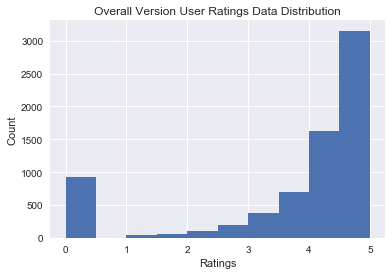

In [18]:
# lets first look at our main feature of interest, the 'user_rating'
# user_rating : average user rating for all versions

plt.hist(data = appleStore, x = "user_rating");
plt.xlabel('Ratings');
plt.ylabel('Count');
plt.title('Overall Version User Ratings Data Distribution');

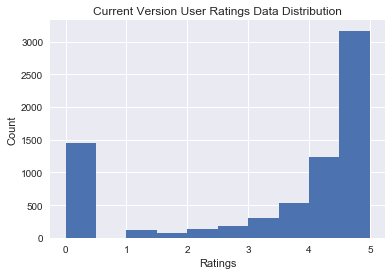

In [19]:
# lets take a look at the data distribution for user_rating_ver
# user_rating_ver : average user rating for all versions

plt.hist(data = appleStore, x = "user_rating_ver");
plt.xlabel('Ratings');
plt.ylabel('Count');
plt.title('Current Version User Ratings Data Distribution');

1. On both plots, there is a special peak at 0 and then a gap and then, a highly left skewed distribution. 
We can somewhat observe that there are more number of higher ratings ranging from 4 to 5 compared to the lower ones. Also, the user rating data is a discrete data with values like 0, 0.5, 1, 1.5 ... 4.5, 5. 
It makes sense to have a gap of 0.5, as users normally doesn't give 0.5 as ratings.
2. The data distribution for the current user ratings and that for all versions are pretty similar with a very minimal increase of count in the rating 1 for current version user_rating as compared to rating 1 for all versions user_ratings.

In [20]:
# check the values for user ratings
appleStore.user_rating.value_counts()

4.5    2663
4.0    1626
0.0     929
3.5     702
5.0     492
3.0     383
2.5     196
2.0     106
1.5      56
1.0      44
Name: user_rating, dtype: int64

Checking the price data distribution

In [21]:
# statistics of the price data
appleStore.price.describe()

count    7197.000000
mean        1.726218
std         5.833006
min         0.000000
25%         0.000000
50%         0.000000
75%         1.990000
max       299.990000
Name: price, dtype: float64

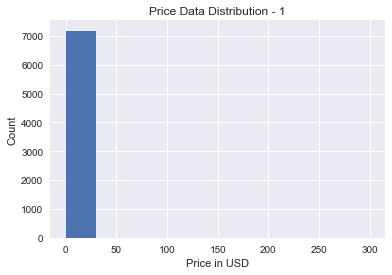

In [24]:
# distribution for price
plt.hist(data = appleStore, x = "price");
plt.xlabel('Price in USD');
plt.ylabel('Count');
plt.title('Price Data Distribution - 1');

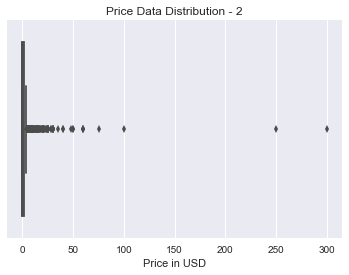

In [25]:
# distribution for price using boxplot
sb.boxplot(data = appleStore, x = "price");
plt.xlabel('Price in USD');
#plt.ylabel('Count');
plt.title('Price Data Distribution - 2');

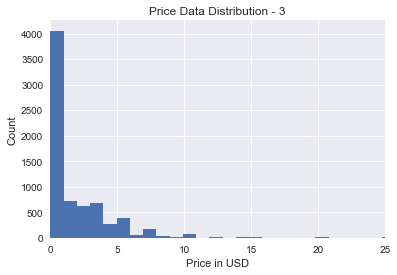

In [26]:
# limiting the price values to 25 to get a detail view of the distribution
# putting the bin size to 0.99, as the price are in the descrete range 0, 0.99, 1.99 ..
bin_size = 0.99
bins_price = np.arange(0, 25+bin_size, bin_size)
plt.hist(data = appleStore, x = "price", bins = bins_price);
plt.xlim(0,25);
plt.xlabel('Price in USD');
plt.ylabel('Count');
plt.title('Price Data Distribution - 3');

In [28]:
appleStore.query('price == 0.0').shape[0]

4056

We can see that the distribution for "price" data is extremely right skewed, with almost all data range falling from 0 to 5 USD's and some few outliers data that is making the distribution highly skewed. We'll have to investigate more on these outliers and their possible impacts.

Also, there is a large amount of data values with price 0, I think these are the free applications. We will have to group these free and paid applications on different datasets for easier and simpler analysis.

In [29]:
# selecting the high price outliers

high_outliers = ((appleStore['price'] > 30))
print(high_outliers.sum())
print(appleStore.loc[high_outliers,:])

13
              id                                         track_name  \
115    308368164                     Proloquo2Go - Symbol-based AAC   
162    320279293                                     NAVIGON Europe   
778    432278816                        プチ・ロワイヤル仏和辞典（第4版）・和仏辞典（第3版）   
1136   491998279                           Articulation Station Pro   
1479   551215116                                LAMP Words For Life   
1688   583976519           Cubasis 2 - Mobile Music Creation System   
2181   700440156                       Articulation Test Center Pro   
2405   791077159                                        KORG Gadget   
2568   849732663                                        KNFB Reader   
3012   920133658  Anatomy & Physiology: Body Structures and Func...   
3093   932191687                                        KORG Module   
3238   946930094   FineScanner Pro - PDF Document Scanner App + OCR   
5340  1080310524   VPN Pro | Lifetime Proxy & Best VPN by Betternet   

  

There are 13 apps that has prices higher than 30, with two apps with extremely priced with 249.99 and 299.99 USD, then the rest of the apps. These data seems to be valid. But we can filter these two apps for easier and simpler analysis and also since the user_ratings for these two apps are almost similar to the average user_ratings.

Checking the size_bytes data distribution

In [30]:
# statistics of the size data
appleStore.size_bytes.describe()

count    7.197000e+03
mean     1.991345e+08
std      3.592069e+08
min      5.898240e+05
25%      4.692275e+07
50%      9.715302e+07
75%      1.819249e+08
max      4.025970e+09
Name: size_bytes, dtype: float64

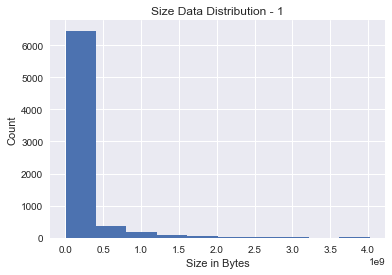

In [31]:
# distribution for size data
plt.hist(data = appleStore, x = "size_bytes");
plt.xlabel('Size in Bytes');
plt.ylabel('Count');
plt.title('Size Data Distribution - 1');

In [32]:
np.log10(appleStore.size_bytes.describe())

count    3.857152
mean     8.299146
std      8.555345
min      5.770722
25%      7.671383
50%      7.987456
75%      8.259892
max      9.604870
Name: size_bytes, dtype: float64

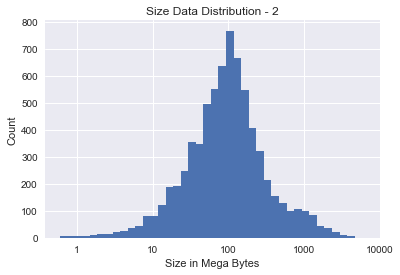

In [33]:
# logarithmic presentation of the size data
bin_size = 0.1
bins = 10 **  np.arange(5.77, 9.6 + bin_size, bin_size)
plt.hist(data = appleStore, x = "size_bytes", bins = bins);
plt.xlabel('Size in Mega Bytes');
plt.xscale('log');
plt.ylabel('Count');
plt.xticks([1e6, 1e7, 1e8, 1e9, 1e10], ['1', '10', '100', '1000', '10000']);
plt.title('Size Data Distribution - 2');

In [34]:
appleStore.query('size_bytes > 1000000000')['price'].count()

270

The size distribution data has also a very long tail towards right, with major portion of the spread lying between 0 to 400 MB (as observed in Size Data Distribution - 1). When plotted on log scale (Size Data Distribution - 2), the size data distribution gives a more detail presentation and takes a modular shape with a peak value around 100 MB. 

Now, lets explore the distributions for the rest of the features that I think, have a smaller degree of effects on user ratings.

Lets start with 'prime_genre'

In [5]:
# setting the base color
base_color = sb.color_palette()[0]

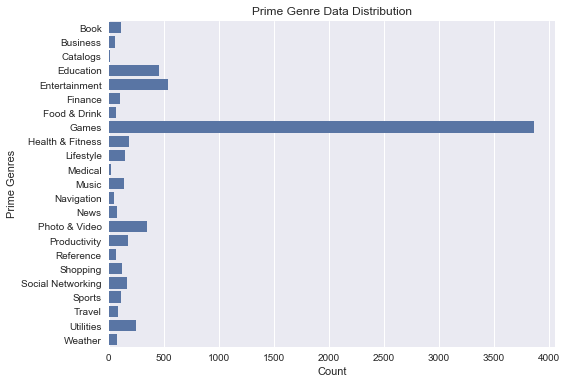

In [36]:
# distribution for prime_genre
plt.figure(figsize = [8,6])
sb.countplot(data = appleStore, y = 'prime_genre', color = base_color)
plt.ylabel('Prime Genres');
plt.xlabel('Count');
plt.title('Prime Genre Data Distribution');

The bar chart for the prime_genre of the apps says there is hugh dominancy of gaming apps in the app world, and then on the other side lies the rest of the genres leaded by Education and Entertainment. 

In [37]:
# checking the content rating values
appleStore.cont_rating.value_counts()

4+     4433
12+    1155
9+      987
17+     622
Name: cont_rating, dtype: int64

In [6]:
# making the order for the cont_rating column as per the age wise
cont_classes = ['4+','9+','12+','17+']
appleStore['cont_rating'] = appleStore['cont_rating'].astype(object).astype('category',ordered=True,categories=cont_classes)


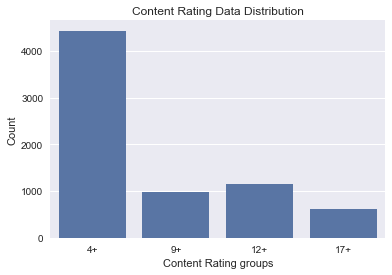

In [41]:
# distribution for cont_rating
sb.countplot(data = appleStore, x = 'cont_rating', color = base_color)
plt.xlabel('Content Rating groups');
plt.ylabel('Count');
plt.title('Content Rating Data Distribution');

More than half of the apps focused on lower age group users and those with the adult age groups (17+) with the fewest number of the apps.

In [42]:
#statistics for number of language supported data
appleStore.lang_num.describe()

count    7197.000000
mean        5.434903
std         7.919593
min         0.000000
25%         1.000000
50%         1.000000
75%         8.000000
max        75.000000
Name: lang_num, dtype: float64

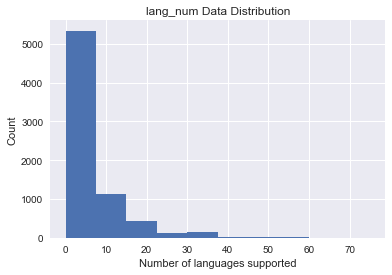

In [43]:
# distribution for lang_num
plt.hist(data = appleStore, x = 'lang_num');
plt.xlabel('Number of languages supported');
plt.ylabel('Count');
plt.title('lang_num Data Distribution');

In [44]:
# checking how many apps has language supported more than 20
appleStore.query('lang_num > 20').shape[0]

377

I think we can limit our analysis for lang_num by limiting to only those apps with 20 or less number of languages supported, as we can see more than 90% of our apps has less than 20 langauages supported. This will also give us more detail information on how the data is distributed as below.

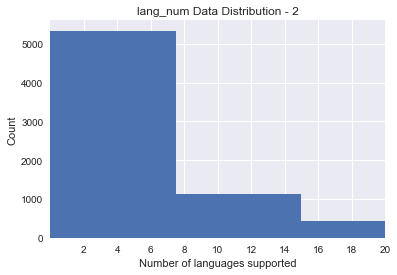

In [45]:
# distribution for lang_num - limiting upto 20 counts only
plt.hist(data = appleStore, x = 'lang_num');
plt.xlabel('Number of languages supported');
plt.xlim([0,20]);
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20], ['2', '4', '6', '8', '10','12', '14', '16', '18', '20']);
plt.ylabel('Count');
plt.title('lang_num Data Distribution - 2');

The histogram shows that most of the apps falls between 0-7 number of supported languages, followed by a gradual decrease in the number of apps with increasing number of supporting languages. 
The highly skewed visual in the first lang_num plot also shows, some outliers with a very high number of supporting languages.

Lastly, lets look the rating counts data distribution.

In [46]:
# ratings counts data statistics 
print(appleStore.rating_count_tot.describe())
print(appleStore.rating_count_ver.describe())

count    7.197000e+03
mean     1.289291e+04
std      7.573941e+04
min      0.000000e+00
25%      2.800000e+01
50%      3.000000e+02
75%      2.793000e+03
max      2.974676e+06
Name: rating_count_tot, dtype: float64
count      7197.000000
mean        460.373906
std        3920.455183
min           0.000000
25%           1.000000
50%          23.000000
75%         140.000000
max      177050.000000
Name: rating_count_ver, dtype: float64


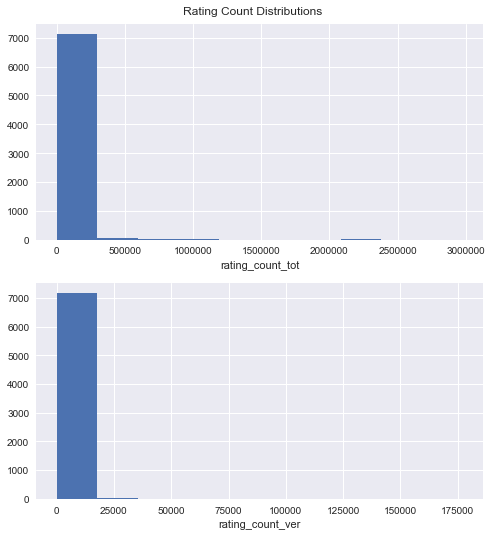

In [9]:
# let's check the data distribution for rating_count_tot and rating_count_ver

fig, ax = plt.subplots(nrows=2, figsize = [8,8])

variables = ['rating_count_tot', 'rating_count_ver']
for i in range(len(variables)):
    var = variables[i]
    ax[i].hist(data = appleStore, x = var);
    ax[i].set_xlabel('{}'.format(var))
plt.subplots_adjust(top = 0.95)
plt.suptitle('Rating Count Distributions');
plt.show()


The above plot shows that for both the rating_count_tot and rating_count_ver, most of the data points falls on the extreme left most axes and there is a high value outliers on the right.
Lets try to identify these outliers and see if they can be eliminated from analysis.

In [50]:
# selecting the high outliers

high_outliers = ((appleStore['rating_count_tot'] > 300000) | (appleStore['rating_count_ver'] > 20000))
print(high_outliers.sum())
print(appleStore.loc[high_outliers,:])

79
              id                                         track_name  \
4      282935706                                              Bible   
7      284035177                            Pandora - Music & Radio   
12     284815942               Google – Search made just for mobile   
16     284882215                                           Facebook   
18     284993459  Shazam - Discover music, artists, videos & lyrics   
45     293622097                                       Google Earth   
47     293778748                                            PAC-MAN   
53     295646461      The Weather Channel: Forecast, Radar & Alerts   
59     297368629  Lose It! – Weight Loss Program and Calorie Cou...   
91     304878510                                   Skype for iPhone   
92     305343404                                             Tumblr   
109    307727765                                        Doodle Jump   
125    310633997                                 WhatsApp Messenger   
127

The data for the extreme high outlier points looks valid . It is quite possible that these apps are very popular and almost every user that uses these apps give ratings (the user_rating values for these apps are generally high with 3.5 being the lowest). More importantly, since the user rating value is a discrete value ranging as 0, 0.5, 1, 1.5.. 5.0 and with a small range from 0 to 5, I would rather keep these apps with the extremely high rating_count's and include in the analysis.

Still lets try to find how the rating_count data are being spread using log scale plotting.

In [51]:
np.log10(appleStore.rating_count_tot.describe())

count    3.857152
mean     4.110351
std      4.879322
min          -inf
25%      1.447158
50%      2.477121
75%      3.446071
max      6.473440
Name: rating_count_tot, dtype: float64

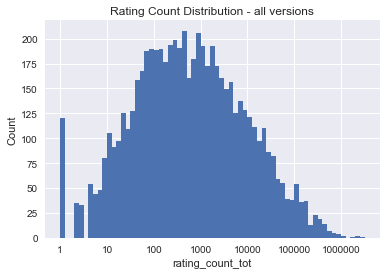

In [53]:
# Plot in xlog scale for rating_count_tot
bin_size = 0.1
bins = 10 **  np.arange(0.0, 6.48 + bin_size, bin_size)
plt.hist(data = appleStore, x = "rating_count_tot", bins = bins);
plt.xlabel('rating_count_tot');
plt.xscale('log');
plt.ylabel('Count');
plt.title('Rating Count Distribution - all versions')
plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000], ['1', '10', '100', '1000', '10000','100000','1000000']);

In [54]:
np.log10(appleStore.rating_count_ver.describe())

count    3.857152
mean     2.663111
std      3.593336
min          -inf
25%      0.000000
50%      1.361728
75%      2.146128
max      5.248096
Name: rating_count_ver, dtype: float64

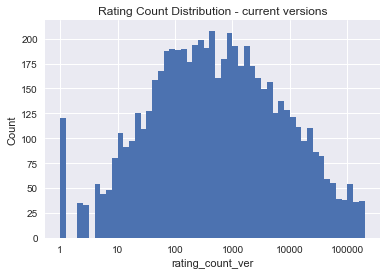

In [55]:
# Similarly plot in xlog scale for rating_count_ver
bin_size = 0.1
bins = 10 **  np.arange(0.0, 5.3 + bin_size, bin_size)
plt.hist(data = appleStore, x = "rating_count_tot", bins = bins);
plt.xlabel('rating_count_ver');
plt.xscale('log');
plt.ylabel('Count');
plt.title('Rating Count Distribution - current versions')
plt.xticks([1, 10, 100, 1000, 10000, 100000], ['1', '10', '100', '1000', '10000','100000']);

When plotted using logscale transformation, we can see that see a modular distribution of data for both rating counts, with major points plotted around 700 - 7000 for rating_count_tot and around 80-1500 for the rating_count_ver data.

Lastly, there is another thing that I wanted to check. I see a large number of 0 ratings for many apps, so just wanted to make sure if the users really gave a 0 rating for an app, or its just because there is no rating provided and hence by default they are given a 0 rating.

Since, rating_count_tot and rating_count_ver gave the total count number of all the ratings an app gets from all the users, we can validate our above check using these variables.

In [56]:
# check for user ratings of all versions.
appleStore.query('user_rating == 0.0 and rating_count_tot!= 0.0').shape[0]

0

In [57]:
# check for user ratings of all versions.
appleStore.query('user_rating_ver == 0.0 and rating_count_ver!= 0.0').shape[0]

0

So, now we know that if an app has a 0 rating, that means no user has given a rating for that app.

In [59]:
# also lets check if there are any apps that has rating_count_tot 0 but rating_count_ver nonzero
appleStore.query('rating_count_tot == 0.0 and rating_count_ver != 0.0').shape[0]

0

So, we can do more filter in the dataset by removing those apps with no ratings given by any user.

#### More Wrangling and Cleaning ####
- Remove all the apps with 0 rating_count_tot
- Remove the two records with the highest price values.

In [7]:
# removing those apps with 0 rating_count_tot
appleStore = appleStore.query('rating_count_tot != 0.0')

In [8]:
# removing the apps with extreme high prices
appleStore = appleStore.query('price < 200')

Check if all 0 rating_count_tot data and the two apps with extreme high price are removed.

In [10]:
#Check if the apps with 0 rating_count_tot are removed
appleStore.query('rating_count_tot == 0.0').shape[0]

0

In [11]:
appleStore.query('price > 200')['id'].count()

0

For analyzing free and paid apps differently, I'm creating two datasets : One for Free and another for Paid.

In [9]:
free_apps = appleStore.query('price == 0.0')
paid_apps = appleStore.query('price != 0.0')

In [13]:
free_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3383 entries, 1 to 7196
Data columns (total 16 columns):
id                  3383 non-null object
track_name          3383 non-null object
size_bytes          3383 non-null int64
currency            3383 non-null object
price               3383 non-null float64
rating_count_tot    3383 non-null int64
rating_count_ver    3383 non-null int64
user_rating         3383 non-null float64
user_rating_ver     3383 non-null float64
ver                 3383 non-null object
cont_rating         3383 non-null category
prime_genre         3383 non-null category
sup_devices_num     3383 non-null int64
ipadSc_urls_num     3383 non-null int64
lang_num            3383 non-null int64
vpp_lic             3383 non-null category
dtypes: category(3), float64(3), int64(6), object(4)
memory usage: 381.0+ KB


In [14]:
paid_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2883 entries, 0 to 7194
Data columns (total 16 columns):
id                  2883 non-null object
track_name          2883 non-null object
size_bytes          2883 non-null int64
currency            2883 non-null object
price               2883 non-null float64
rating_count_tot    2883 non-null int64
rating_count_ver    2883 non-null int64
user_rating         2883 non-null float64
user_rating_ver     2883 non-null float64
ver                 2883 non-null object
cont_rating         2883 non-null category
prime_genre         2883 non-null category
sup_devices_num     2883 non-null int64
ipadSc_urls_num     2883 non-null int64
lang_num            2883 non-null int64
vpp_lic             2883 non-null category
dtypes: category(3), float64(3), int64(6), object(4)
memory usage: 324.9+ KB


### Some Notes on Univariate Exploration.
#### On main feature of interest - User Ratings.

- The distributions for my main variable of interest 'user_rating' and 'user_rating_ver' have a special peak at the value 0 and then a gap, and then followed by a highly left skewed distribution. The user rating data is a discrete data with values like 0, 0.5, 1, 1.5 ... 4.5, 5. It makes sense to have a gap of 0.5, as user normally doesn't give 0.5 as ratings.
- I don't need to perform any transformations as the data points have a lower range with data values ranging from 0.0, 0.5, 1.0,...4.5, 5.0.

#### On rest of the supporting features.

- Almost all of the features starting from 'price', 'size', 'num_of_lang', 'rating_count_tot' and 'rating_count_ver' are highly right skewed.
- The 'price' data distribution have very few outliers with unusally high values and two extremely high. Even though the data looks valid, I'm filtering these two data with prices 249.99 and 299.99 for simpler analysis, also considering that the user ratings for these two apps are just about the average and so will not have much impact even if I removed them.
- There is a large group of data with price value 0.0, which I think are free apps. So, I created two datasets, one for free apps and another for paid apps.
- The 'size' data distribution also has a very large range of values with a very long right tail. I plotted using log transform and can see a modular distribution with a peak value around 100 MB.
- Similarly the rating_count_tot and rating_count_ver distribution also has a very large range of data distribution with highly skewed in the right. Using log transform and plotting it, a modular distribution is observed for both rating counts, with major points plotted around 700 - 7000 for rating_count_tot and around 80-1500 for the rating_count_ver data.

## Bivariate Exploration

First lets look at the relation between the app_types and user ratings.

In [15]:
# user rating statistics for the free and the paid apps
print(free_apps.user_rating.describe())
print(paid_apps.user_rating.describe())

count    3383.000000
mean        4.048478
std         0.723446
min         1.000000
25%         4.000000
50%         4.500000
75%         4.500000
max         5.000000
Name: user_rating, dtype: float64
count    2883.000000
mean        4.051162
std         0.731397
min         1.000000
25%         4.000000
50%         4.000000
75%         4.500000
max         5.000000
Name: user_rating, dtype: float64


In [10]:
# create a temporary dataset with the apps types
temp = appleStore.copy()

def app_type(price):
    if price == 0.0:
        return "Free"
    else:
        return "Paid"

In [11]:
temp['app_type'] = temp['price'].apply(app_type)
temp['app_type'] = temp['app_type'].astype('category')

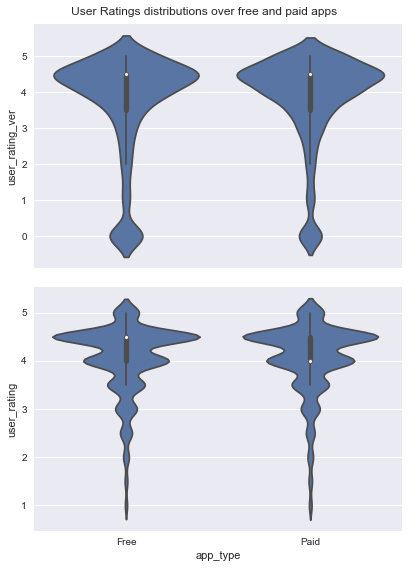

In [12]:
# user rating distributions for the free and the paid apps.
def violin_plot(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.violinplot(x, y, color = default_color);

g = sb.PairGrid(data = temp, y_vars = ['user_rating_ver', 'user_rating'], x_vars = 'app_type',
                size = 4, aspect = 1.5);
g.map(violin_plot);
plt.subplots_adjust(top =0.95)
plt.suptitle('User Ratings distributions over free and paid apps');
plt.show();

It appears that the user_ratings distributions (both current and all versions) for the apps are pretty similar irrespective of whether free or paid with major data around 4.5 user_ratings. The mean user ratings for overall versions for the paid apps is slightly lower than that of the free ones.

Now lets look at the pairwise correlations between the different variables in the data for both the free and the paid apps.

In [13]:
numeric_vars_free = ['size_bytes',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver','lang_num']
numeric_vars_paid = ['size_bytes','price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver','lang_num']
categoric_vars = ['cont_rating','prime_genre']

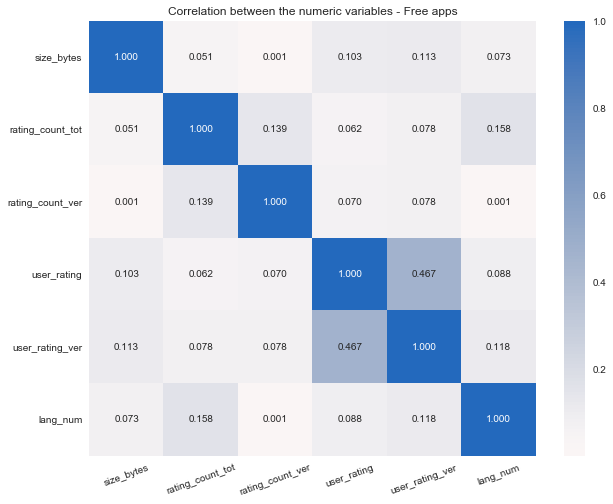

In [49]:
# correlation plot for free apps
# there is no price variable for the free apps group.
plt.figure(figsize = [10, 8])
sb.heatmap(free_apps[numeric_vars_free].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation between the numeric variables - Free apps')
plt.xticks(rotation = 20);
plt.show()

For the free apps, I observed a very weak positive relationship between the user ratings and the rest of the numeric variables, also a slight increase in the strength of the relation for current version ratings above the overall ratings. For e.g. the strength value for overall user rating (user_rating) and the size_bytes is 0.14 but is 0.153 for the current version ratings (user_rating_ver).

It could be possible that since the values count for user ratings are discrete and small (from 0.0, 0.5 -- 4.5 , 5.0), the strength values in the heat map are generally low, but I think for this kind of case, a little sense of positive relation depicted by our heat map plot gives a general idea of how the numeric variables relates to one another.

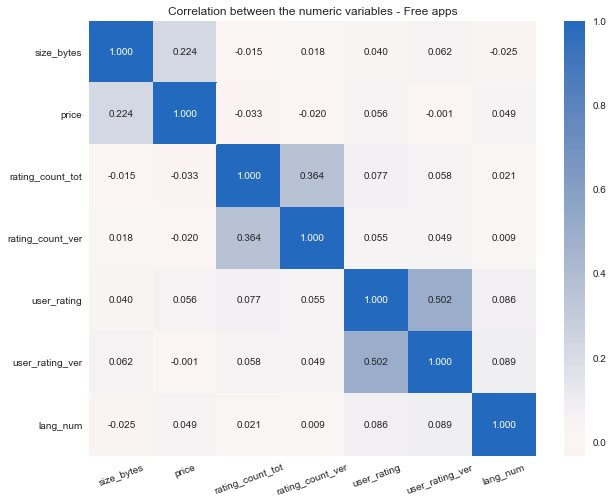

In [51]:
# correlation plot for paid apps
plt.figure(figsize = [10, 8])
sb.heatmap(paid_apps[numeric_vars_paid].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation between the numeric variables - Paid apps')
plt.title('Correlation between the numeric variables - Free apps')
plt.xticks(rotation = 20);
plt.show()

A little different from the free apps, the user ratings for the Paid apps shows a variant relationship with the rest of the numeric variables. 

For e.g. relation between user_rating and size_bytes is negative while that of user_rating_ver and size_bytes is positive. Similar for relation with the price, now, this needs to be explored more and it will be interesting to find how the price, size and the user ratings co-relate. Other than these, the heat map depicts positive relation for the user ratings with the rest of the numeric variables.

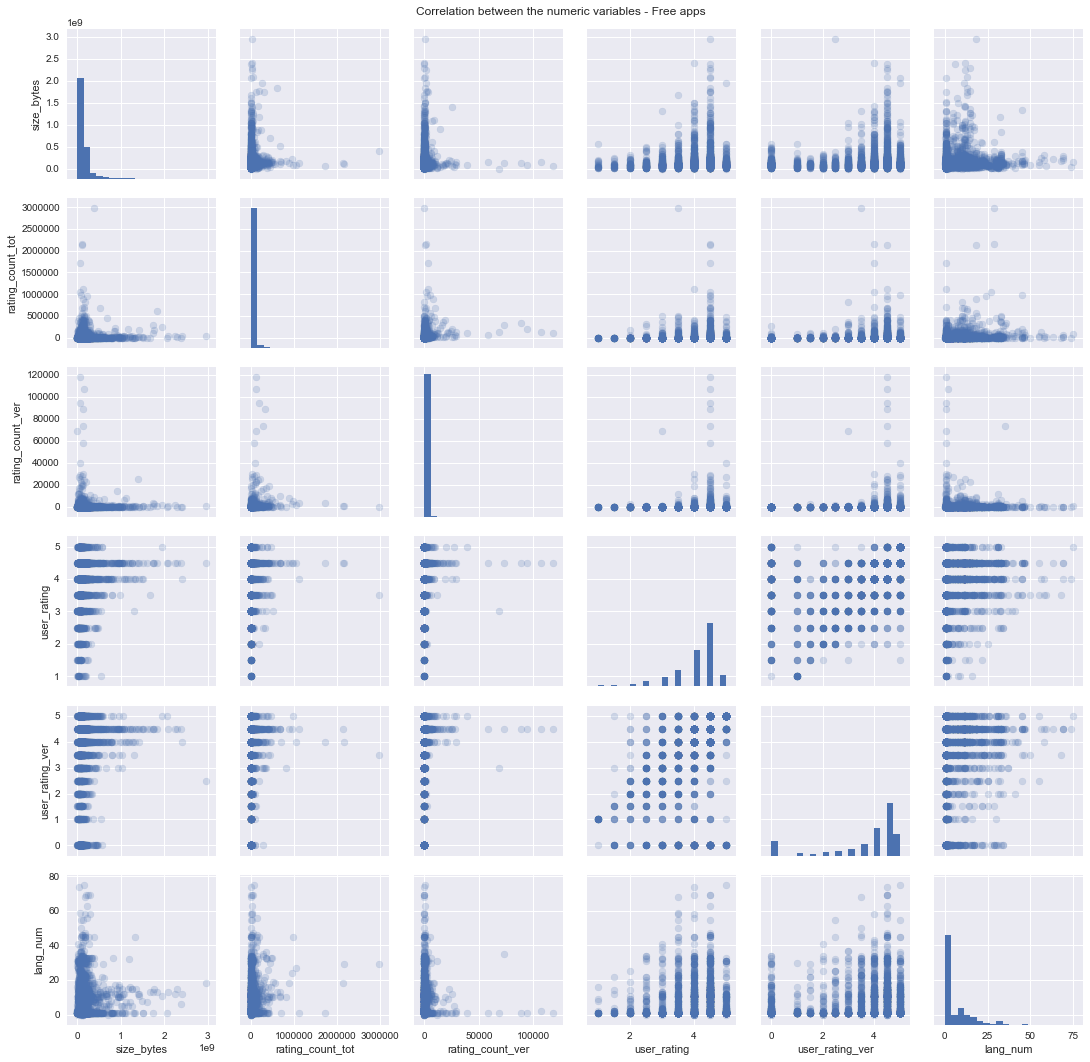

In [29]:
# Showing pairgrid data for the numeric variables for the free apps
g = sb.PairGrid(data = free_apps, vars = numeric_vars_free)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter, alpha = 1/5);
plt.subplots_adjust(top =0.96)
plt.suptitle('Correlation between the numeric variables - Free apps');

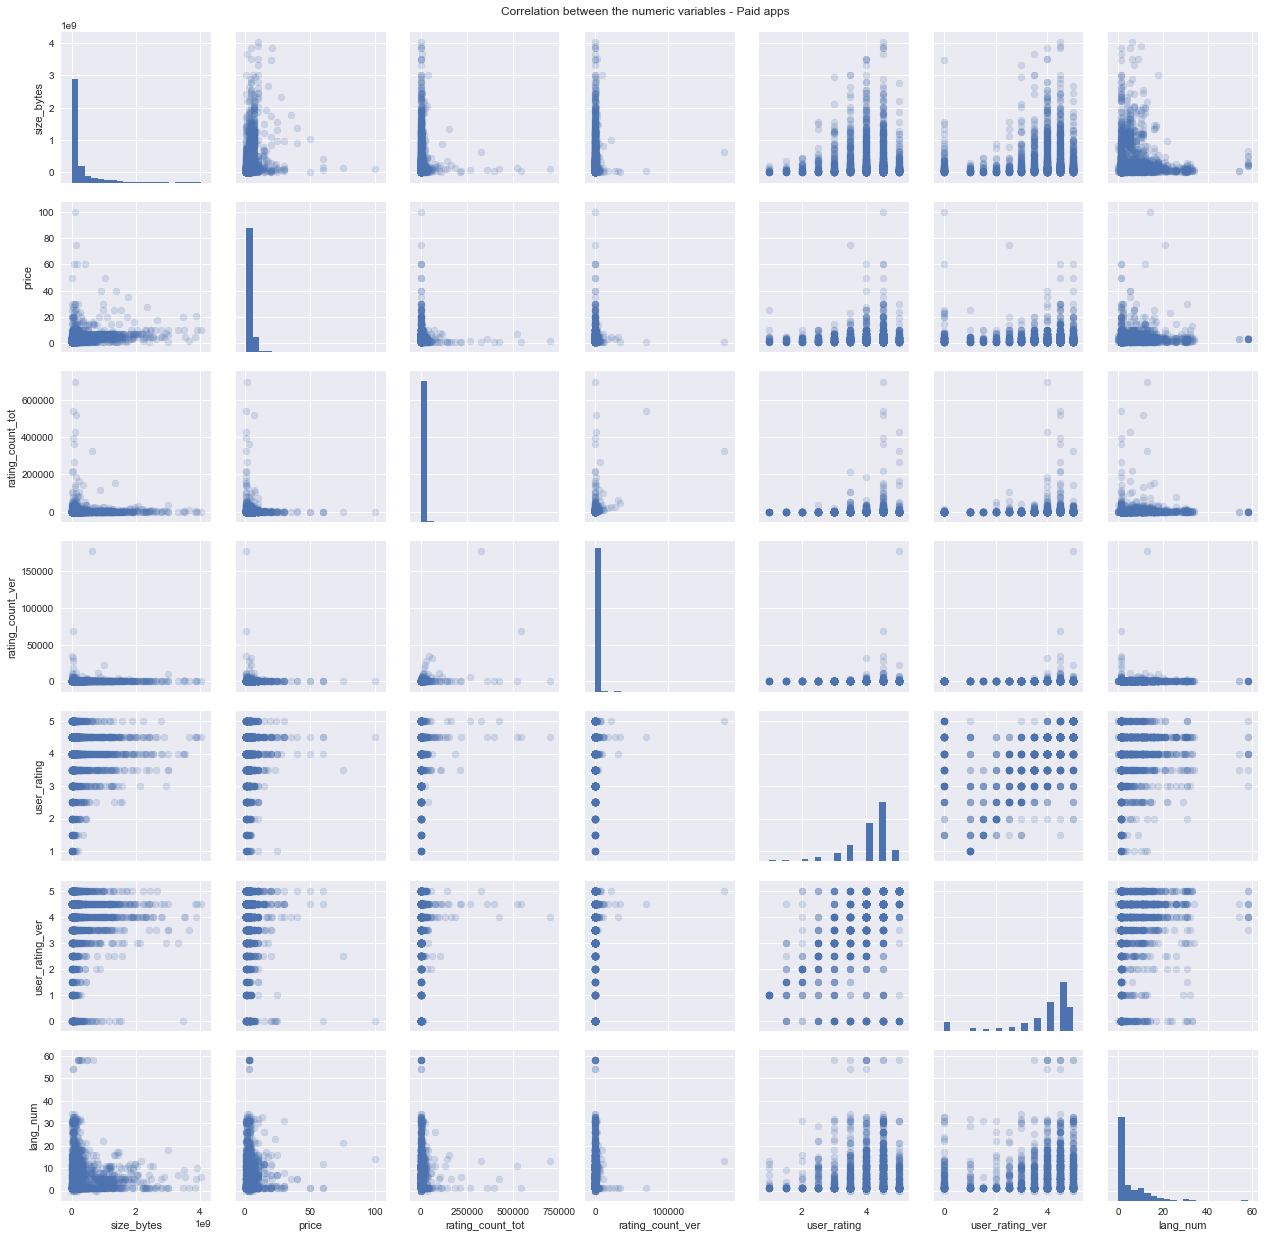

In [30]:
# Showing pairgrid data for the numeric variables for the paid apps

g = sb.PairGrid(data = paid_apps, vars = numeric_vars_paid)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter, alpha = 1/5)
plt.subplots_adjust(top = 0.96)
plt.suptitle('Correlation between the numeric variables - Paid apps');

The above paigrid plots shows much similarity on how the user ratings relate to the rest of the numeric variables in both the free and paid apps. 
For almost all the numeric variables, I observed that the user ratings are more populated around the higher rating values majorly above 3 and peaks at around 4 and 4.5 ratings.

One more point to be noted is that the user_rating(ratings for all versions) and user_rating_ver(user_ratings for current version of the app) distributions are very much similar.

Now lets look at how the user_rating and user_rating_ver co-relates with the categorical variables.

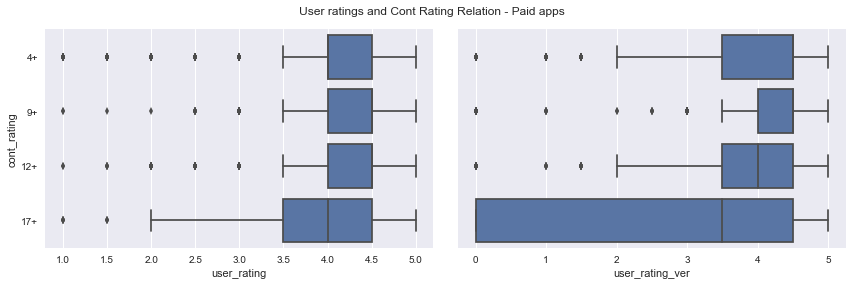

In [36]:
# user_rating and user_rating_ver co-relates with cont_rating for free apps
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

g = sb.PairGrid(data = free_apps, x_vars = ['user_rating', 'user_rating_ver'], y_vars = 'cont_rating',
                size = 4, aspect = 1.5)
g.map(boxgrid)
plt.subplots_adjust(top = 0.9)
plt.suptitle('User ratings and Cont Rating Relation - Paid apps');
plt.show();


Surprisingly the median user ratings for 4+, 9+ and 12+ group ratings are the same with 4 ratings for both the current version and the overall version, I was expecting that the lower group 4+ will have a higher overall user ratings.  Also, it seems the current version has a more data values with wider range of data distribution, while the ratings for the 17+ groups apps seems to be decreasing in the current version. 

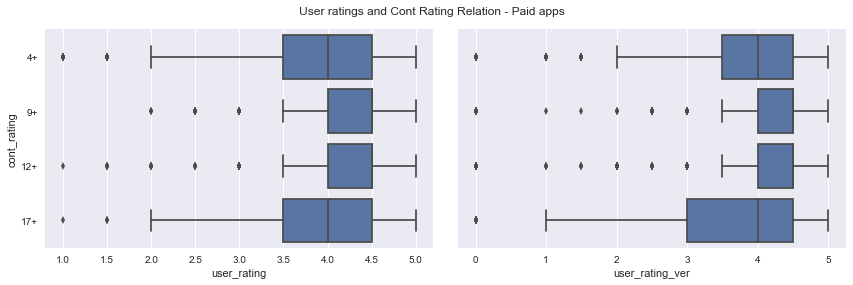

In [37]:
# user_rating and user_rating_ver co-relates with cont_rating for paid apps
g = sb.PairGrid(data = paid_apps, x_vars = ['user_rating', 'user_rating_ver'], y_vars = 'cont_rating',
                size = 4, aspect = 1.5)
g.map(boxgrid)
plt.subplots_adjust(top = 0.9)
plt.suptitle('User ratings and Cont Rating Relation - Paid apps');
plt.show();

Little different from the free apps, the paid apps groups has the same overall ratings for the 4+, 12+ and 17+ groups, but in the current version the 12+ groups shows a overall higher ratings than the rest of the groups. 

It will be interesting to explore how the cont_ratings groups relates with the prime_genres and then how this relation impacts the user_ratings.

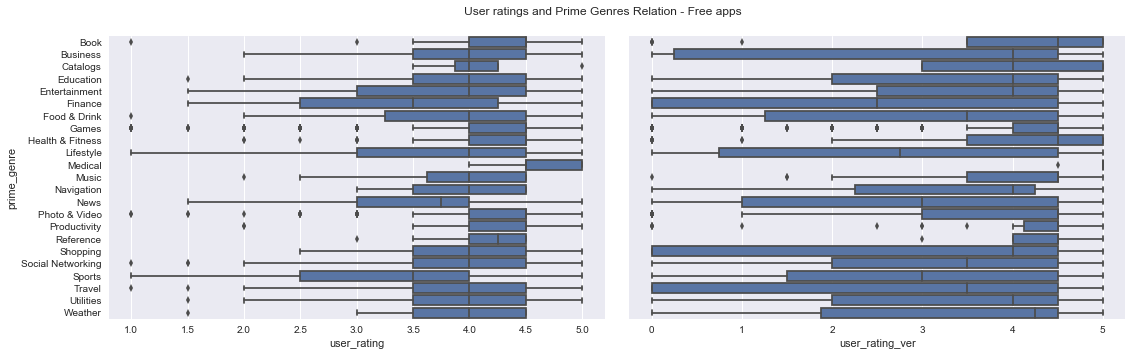

In [38]:
# user_rating and user_rating_ver co-relates with prime_genre for free apps
g = sb.PairGrid(data = free_apps, x_vars = ['user_rating', 'user_rating_ver'], y_vars = 'prime_genre',
                size = 5, aspect = 1.5)
g.map(boxgrid)
plt.subplots_adjust(top = 0.9)
plt.suptitle('User ratings and Prime Genres Relation - Free apps');
plt.show();

Health & Fitness and the Medical genres surprisingly has higher ratings then the rest of the genres in both the overall and the current version and Lifestyle, Travel and Sports genres with the least contributions to the user_ratings.

As compared to the overall user_ratings, users tends to give more ratings on the current versions of the apps as we can see from the above plot, the density of data distribution in the user_rating_ver is pretty much higher than the user_rating distribution on the left.

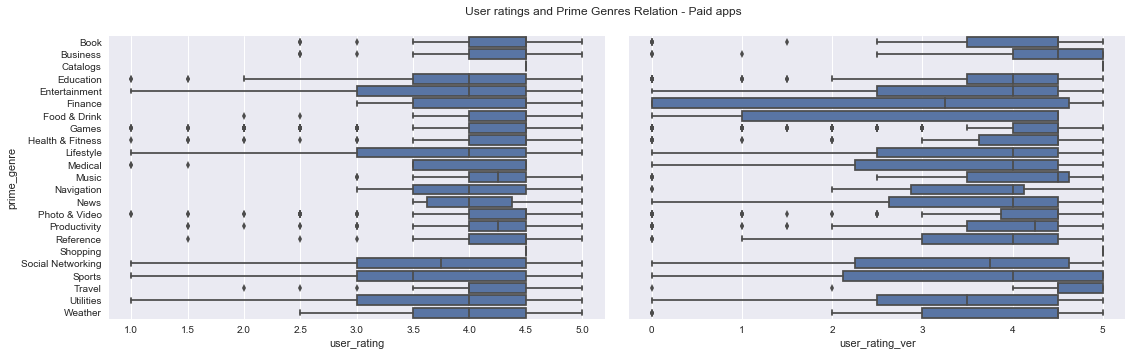

In [39]:
# user_rating and user_rating_ver co-relates with prime_genre for paid apps
g = sb.PairGrid(data = paid_apps, x_vars = ['user_rating', 'user_rating_ver'], y_vars = 'prime_genre',
                size = 5, aspect = 1.5)
g.map(boxgrid)
plt.subplots_adjust(top = 0.9)
plt.suptitle('User ratings and Prime Genres Relation - Paid apps');
plt.show();

For the paid apps, almost all the genres have a similar overall user rating around 4.0, finance a little higher and sports and social networking little lower than the rest.
But for the current version ratings, the median ratings spread out between 3.5 and 4.0 majorly.  Business and Travel genre are little higher and finance and social networking little lower. 
Strange results for the Finance genre, being the highest rating in overall user rating and the lowest rating in the current versions. Quite not sure, what could be the possible reason, but would be interesting to find how the user ratings relates with the genres and maybe with the other categoric variable, the cont_rating, combined. Lets look more into these when performing multivariate explorations.

Now lets look at how the user ratings co-relate with the rest of the variables individually.

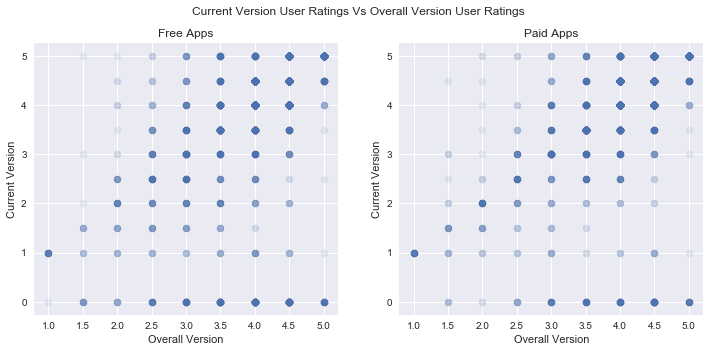

In [14]:
# starting with the current version user ratings and the overall versions user ratings.
plt.figure(figsize = [12,5])

# left scatter plot for free apps
plt.subplot(1,2,1)
plt.scatter(data = free_apps, x = 'user_rating', y = 'user_rating_ver', alpha = 1/10)
plt.xlabel('Overall Version');
plt.ylabel('Current Version');
plt.title('Free Apps');

plt.subplot(1,2,2)
plt.scatter(data = paid_apps, x = 'user_rating', y = 'user_rating_ver', alpha = 1/10)
plt.xlabel('Overall Version');
plt.ylabel('Current Version');
plt.title('Paid Apps');

plt.suptitle('Current Version User Ratings Vs Overall Version User Ratings');
#https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot

The scatterplot between the user ratings for the overall version and the current version of the apps shows a somewhat strong positive relation for both the free and the paid apps. 

The unusual 0 ratings for the current versions with a non-zero overall version ratings, I think seems that there is no rating listed by any of the users for these apps. Lets check that below.

In [15]:
free_apps.query('user_rating > 0.0 and user_rating_ver == 0.0')['rating_count_ver'].value_counts()

0    335
Name: rating_count_ver, dtype: int64

In [42]:
paid_apps.query('user_rating > 0.0 and user_rating_ver == 0.0')['rating_count_ver'].value_counts()

0    178
Name: rating_count_ver, dtype: int64

So as expected, it turns out that for some apps, there are no ratings listed for their current versions and that resulted in the unusual plots above.

Next lets find out how the ratings reacts with different app sizes .

In [16]:
# creating a temp dataframe for free apps without 0 current version user ratings
free_apps_no_rating_ver = free_apps.query('user_rating_ver != 0.0')

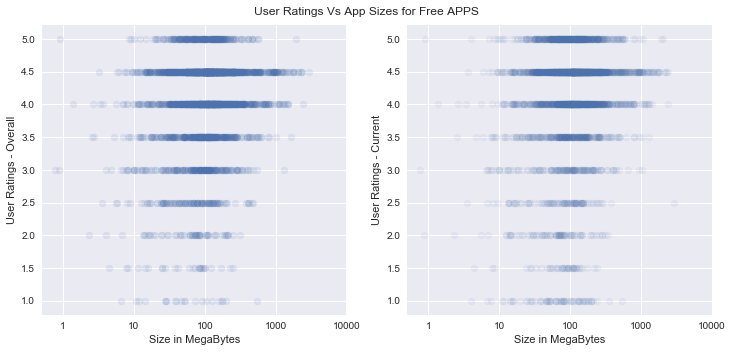

In [21]:
# scatter plot of user ratings vs. size, with log transform on size axis for Free APPS
plt.figure(figsize = [12,5])

# left scatter plot for free apps
plt.subplot(1,2,1)
plt.scatter(data = free_apps, x = 'size_bytes', y = 'user_rating', alpha = 1/10);
plt.xlabel('Size in MegaBytes');
plt.xscale('log');
plt.xticks([1e6, 1e7, 1e8, 1e9, 1e10], ['1', '10', '100', '1000', '10000']);
plt.ylabel('User Ratings - Overall');

plt.subplot(1,2,2)
plt.scatter(data = free_apps_no_rating_ver, x = 'size_bytes', y = 'user_rating_ver', alpha = 1/15);
plt.xlabel('Size in MegaBytes');
plt.xscale('log');
plt.xticks([1e6, 1e7, 1e8, 1e9, 1e10], ['1', '10', '100', '1000', '10000']);
plt.ylabel('User Ratings - Current');
plt.subplots_adjust(top = 0.93)
plt.suptitle('User Ratings Vs App Sizes for Free APPS');

In [22]:
# creating a temp dataframe for paid apps without 0 current version user ratings
paid_apps_no_rating_ver = paid_apps.query('user_rating_ver != 0.0')

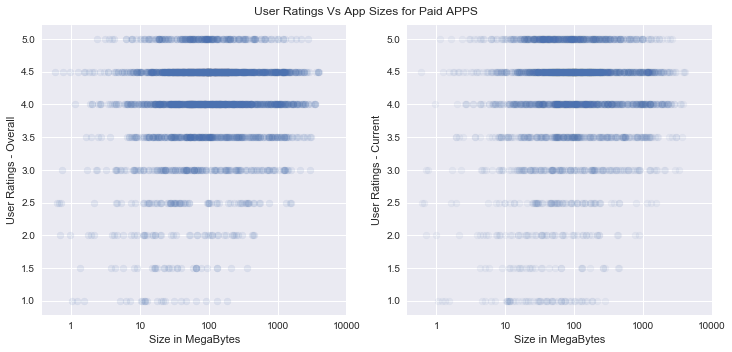

In [23]:
# scatter plot of user ratings vs. size, with log transform on size axis for Paid APPS
plt.figure(figsize = [12,5])

# left scatter plot for free apps
plt.subplot(1,2,1)
plt.scatter(data = paid_apps, x = 'size_bytes', y = 'user_rating', alpha = 1/10);
plt.xlabel('Size in MegaBytes');
plt.xscale('log');
plt.xticks([1e6, 1e7, 1e8, 1e9, 1e10], ['1', '10', '100', '1000', '10000']);
plt.ylabel('User Ratings - Overall');

plt.subplot(1,2,2)
plt.scatter(data = paid_apps_no_rating_ver, x = 'size_bytes', y = 'user_rating_ver', alpha = 1/15);
plt.xlabel('Size in MegaBytes');
plt.xscale('log');
plt.xticks([1e6, 1e7, 1e8, 1e9, 1e10], ['1', '10', '100', '1000', '10000']);
plt.ylabel('User Ratings - Current');
plt.subplots_adjust(top = 0.93)
plt.suptitle('User Ratings Vs App Sizes for Paid APPS');

From the scatter plots above, I can really say that apps with sizes around 100 MB has overall a higher number of ratings given by the users first of all, for both Free and Paid Apps, as we can see more darker plots in and around along the 100 MB zone vertically with majority of higher user ratings values. But since the user ratings values are discrete and less in numbers, I cannot really establish and predict a relationship on how user_ratings react on the change in the app sizes. 
But from the Heat Map that we saw earlier, it depicts a very minimal negative relation between user ratings for current versions and their sizes, rest all with a very small positive relation.

Now lets look at how the user ratings relates to the price variable for the Paid Apps Group.
For this I'm limiting the price upto 25 USD as more than 99% of the data have prices below 25$.

In [24]:
more_than_25 = ((paid_apps['price'] > 25))
print(more_than_25.sum())
print(paid_apps.loc[more_than_25,:])

18
              id                                         track_name  \
162    320279293                                     NAVIGON Europe   
1136   491998279                           Articulation Station Pro   
1188   502803489                                   美食杰-让吃饭变简单(VIP版)   
1688   583976519           Cubasis 2 - Mobile Music Creation System   
2181   700440156                       Articulation Test Center Pro   
2405   791077159                                        KORG Gadget   
2568   849732663                                        KNFB Reader   
2833   900404152                               Extreme Landings Pro   
2949   914189520         The Complete Adventures of Pan (Books 1-7)   
3012   920133658  Anatomy & Physiology: Body Structures and Func...   
3093   932191687                                        KORG Module   
3125   934510730                                  Astropad Standard   
3238   946930094   FineScanner Pro - PDF Document Scanner App + OCR   
345

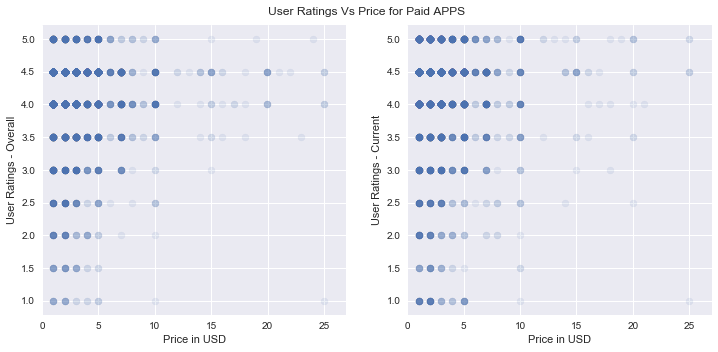

In [26]:
# limiting the x axis price variable upto 25 USD only

plt.figure(figsize = [12,5])
plt.subplot(1,2,1)
plt.scatter(data = paid_apps, x = 'price', y = 'user_rating', alpha = 1/10);
plt.xlabel('Price in USD');
plt.xlim(0,27);
plt.ylabel('User Ratings - Overall');

plt.subplot(1,2,2)
plt.scatter(data = paid_apps_no_rating_ver, x = 'price', y = 'user_rating_ver', alpha = 1/10);
plt.xlabel('Price in USD');
plt.xlim(0,27);
plt.ylabel('User Ratings - Current');
plt.subplots_adjust(top = 0.93)
plt.suptitle('User Ratings Vs Price for Paid APPS');

More users tends to give more ratings on those apps with prices upto 10 USD, majorly with higher ratings values. And lesser count of ratings on apps higher than 10 USD. 

I'm thinking, the price might vary based on different content ratings and also on different genres. So, it would be more interesting to explore on how the price and the other categoric variables relates to impact the user ratings.

Next on our bivariate exploration, lets look at how the user ratings are impacted by the lang_num variable.

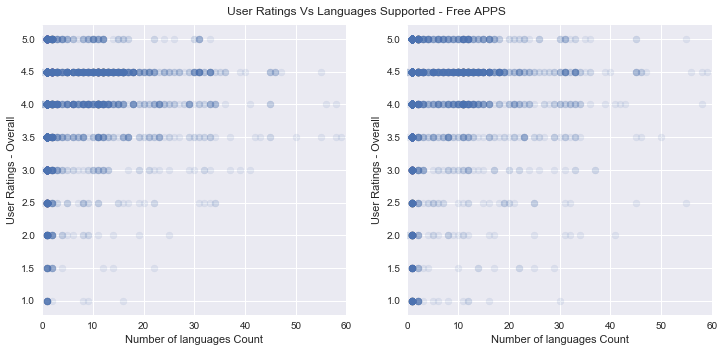

In [27]:
# user ratings and lang_num relationship for free apps

plt.figure(figsize = [12,5])
plt.subplot(1,2,1)
plt.scatter(data = free_apps, x = 'lang_num', y = 'user_rating', alpha = 1/10);
plt.xlim([0,60]);
#plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20], ['2', '4', '6', '8', '10','12', '14', '16', '18', '20']);
plt.xlabel('Number of languages Count');
plt.ylabel('User Ratings - Overall');

plt.subplot(1,2,2)
plt.scatter(data = free_apps_no_rating_ver, x = 'lang_num', y = 'user_rating_ver', alpha = 1/10);
plt.xlim([0,60]);
#plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20], ['2', '4', '6', '8', '10','12', '14', '16', '18', '20']);
plt.xlabel('Number of languages Count');
plt.ylabel('User Ratings - Overall');
plt.subplots_adjust(top = 0.93)
plt.suptitle('User Ratings Vs Languages Supported - Free APPS');

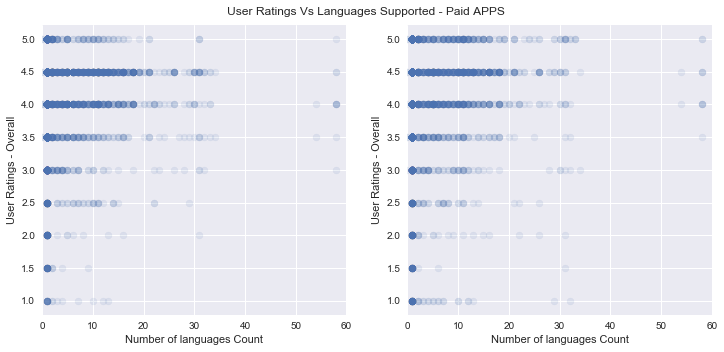

In [28]:
# user ratings and lang_num relationship for free apps

plt.figure(figsize = [12,5])
plt.subplot(1,2,1)
plt.scatter(data = paid_apps, x = 'lang_num', y = 'user_rating', alpha = 1/10);
plt.xlim([0,60]);
plt.xlabel('Number of languages Count');
plt.ylabel('User Ratings - Overall');

plt.subplot(1,2,2)
plt.scatter(data = paid_apps_no_rating_ver, x = 'lang_num', y = 'user_rating_ver', alpha = 1/10);
plt.xlim([0,60]);
plt.xlabel('Number of languages Count');
plt.ylabel('User Ratings - Overall');
plt.subplots_adjust(top = 0.93)
plt.suptitle('User Ratings Vs Languages Supported - Paid APPS');

Except few outliers, user ratings seems to be postively related to lang_num variable until the number of languages supported is upto 30. As the number of languages becomes larger (especially more than 30), then the number of rating counts hughly decreases maybe even 0 for paid apps.

Last but not the least, lets check how the two categoric variables relate with each other. This is something I personally am really interested in finding out.

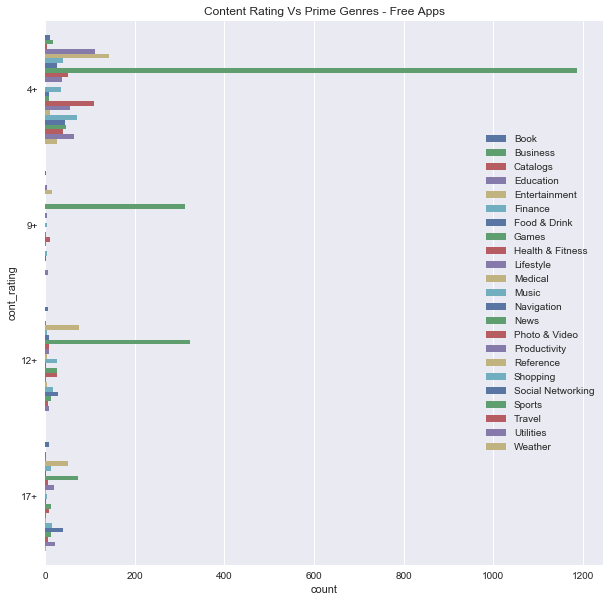

In [56]:
# lets generate a clustered bar chart to find the categoric variables relationship
# this one if for free apps.. 
plt.figure(figsize = [10,10]);
set_color = sb.color_palette();
ax = sb.countplot(data = free_apps, y = 'cont_rating', hue = 'prime_genre',palette=set_color);
ax.legend(loc = 5, framealpha = 1) 
plt.title('Content Rating Vs Prime Genres - Free Apps');

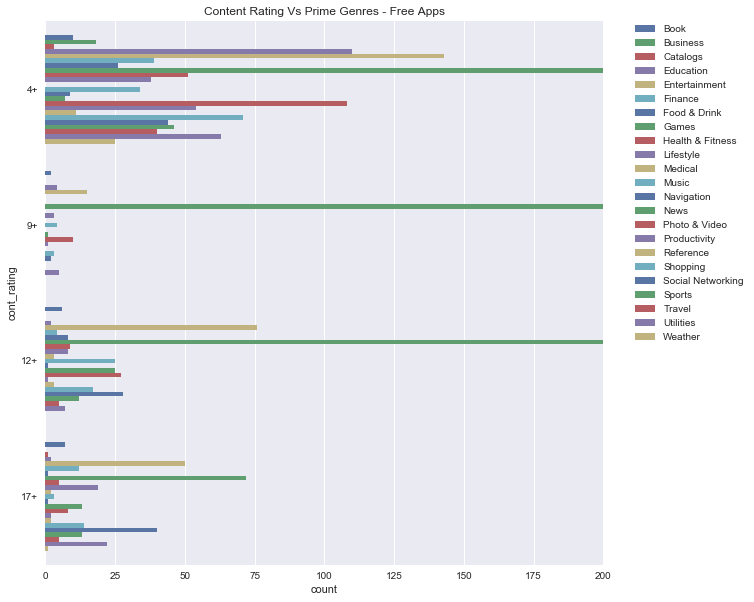

In [61]:
# lets limit the count to 200 to get a more detailed distribution

plt.figure(figsize = [10,10]);
set_color = sb.color_palette();
ax = sb.countplot(data = free_apps, y = 'cont_rating', hue = 'prime_genre',palette=set_color);
ax.legend(loc = 5, framealpha = 1) 
plt.xlim(0,200);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); # legend outside the plot
plt.title('Content Rating Vs Prime Genres - Free Apps');

By limiting the Count to 200, a more detail view of how different genres are distributed over different content rating groups. So, for free apps, Games no doubt has the loingest bar followed by Entertainment and Photo and Video Genres overall.  
For 4+ groups, apart from Genres mentioned above, education, health and fitness, shopping, productivity and Utilities are also very popular and medical, catalogs, news, navigation, business and references are the least popular genres.
9+ groups itself as a whole has very less data except games.
For 12+, social networking, news are books are quite popular.
And for 17+ groups, Social Networking, News, Education and Lifestyle are on top popularity.

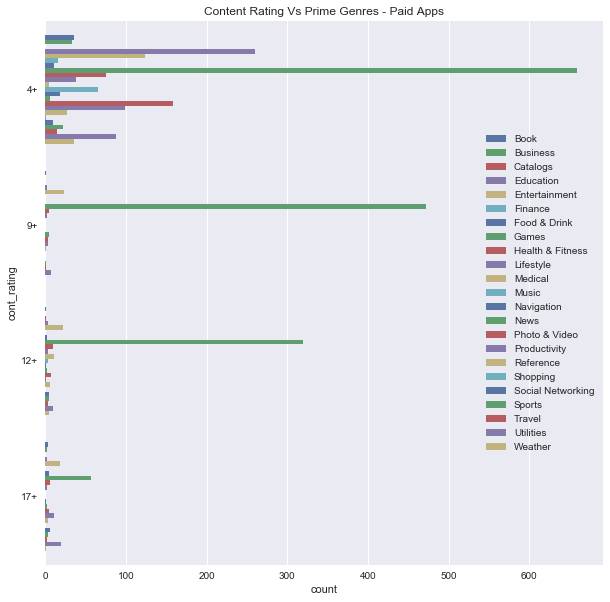

In [58]:
# lets generate a same bar chart for the paid apps also
plt.figure(figsize = [10,10]);
set_color = sb.color_palette();
ax = sb.countplot(data = paid_apps, y = 'cont_rating', hue = 'prime_genre',palette=set_color);
ax.legend(loc = 5, framealpha = 1) 
plt.title('Content Rating Vs Prime Genres - Paid Apps');

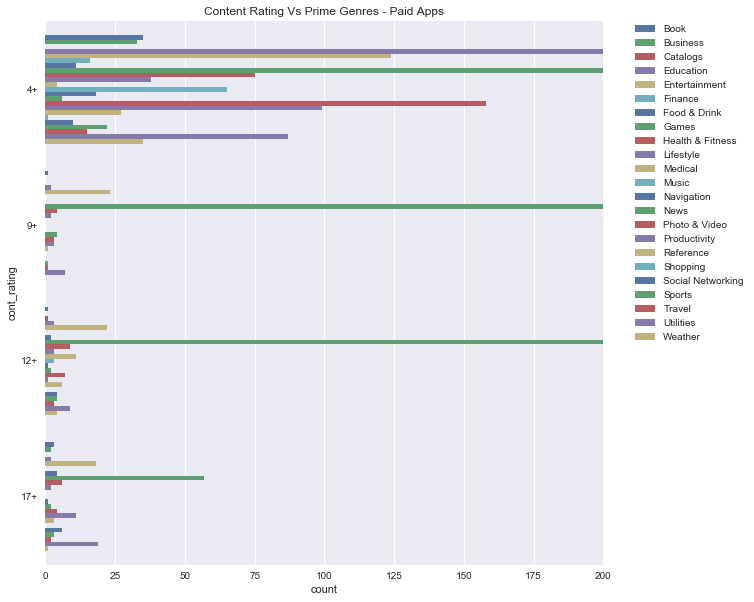

In [62]:
# lets limit the count to 200 to get a more detailed distribution
plt.figure(figsize = [10,10]);
set_color = sb.color_palette();
ax = sb.countplot(data = paid_apps, y = 'cont_rating', hue = 'prime_genre',palette=set_color);
ax.legend(loc = 5, framealpha = 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(0,200);
plt.title('Content Rating Vs Prime Genres - Paid Apps');

For paid apps also, Games no doubt has the longest bar followed by Entertainment with a hugh gap overall.
For 4+ groups, apart from Genres mentioned above, education, health and fitness, photo and video, productivity and Utilities and Music are also very popular and finance, food and drinks, medical, catalogs, news, navigation, shopping and Social Networking are the least popular genres.
9+ groups itself as a whole has very less data except games.
For 12+, Entertainment and  Utilities have more data than the rest of the groups.
And for 17+ groups, Entertainment, Utilities and Productivity have little more than the rest of the groups.

### Some Notes and Conclusions on Bivariate Exploration.
1. User Ratings for the Current versions of the app are strongly related to the ratings for the overall version for both the free and the paid apps.
2. Cannot really establish a linear kind of relationship between the user ratings and the rest of the numeric variables. Below are some of my observations:
	- Apps sizes with sizes around 100 MB has interestingly higher user ratings majorly around 4 and 4.5 ratings.
	- W.r.t prices, apps with prices less than 10 USD gets more number of user ratings and those specially which are less than 5$ have more higher ratings values than those more expensive apps.
3. Now for the relation with the categoric variables.
	- Surprisingly for free apps, the lower cont_ratings groups (4+, 9+, 12+) dominates with higher value ratings than the higher cont rating group (17+). But for the paid apps, all the cont_ratings groups have approaximately similar user ratings, with little higher for the 12+ groups than the rest in the current versions.
	- In Genres, Health & Fitness and the Medical genres have surprisingly higher rating values and Lifestyle, Travel and Sports genres with the lower user rating values on average for the free apps groups.
	- Business and Travel genre are little higher and finance and social networking little lower in the Paid Apps group.
4. From the Heat Map, the user ratings for the overall version of the apps shows a very weak negative relation with the sizes of the apps and the user ratings of the current versions also shows similar relation with the price of the apps.
5. User ratings seems to be positively co-related with the number of languages supported for apps less than 30 supported languages.  with incresing number of languages in the apps, users gave lesser ratings and decreases hughly once it crosses 30.
6. Seeing the relation between the two categoric variables cont_rating and prime_genres, it is an interesting observation on how different genres are distributed across different cont_rating users for both paid and free apps.

## Multivariate Exploration

In the multivariate exploration, first of all lets start with our main variables of interest, the price and size variables across the user ratings. This exploration if only for the paid apps group.
For this, I'll try to use the user_ratings variable as an ordered categoric data. 

In [30]:
# create a temporary dataset with user rating as ordered categoric data
temp_df = paid_apps.copy()

temp_df['user_rating'] = temp_df['user_rating'].astype('category')
temp_df['user_rating_ver'] = temp_df['user_rating_ver'].astype('category')

rating_classes = [1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]
temp_df['user_rating'] = temp_df['user_rating'].astype(object).astype('category',ordered = True, categories=rating_classes)
temp_df['user_rating_ver'] = temp_df['user_rating_ver'].astype(object).astype('category',ordered = True, categories=rating_classes)

temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2883 entries, 0 to 7194
Data columns (total 16 columns):
id                  2883 non-null object
track_name          2883 non-null object
size_bytes          2883 non-null int64
currency            2883 non-null object
price               2883 non-null float64
rating_count_tot    2883 non-null int64
rating_count_ver    2883 non-null int64
user_rating         2883 non-null category
user_rating_ver     2705 non-null category
ver                 2883 non-null object
cont_rating         2883 non-null category
prime_genre         2883 non-null category
sup_devices_num     2883 non-null int64
ipadSc_urls_num     2883 non-null int64
lang_num            2883 non-null int64
vpp_lic             2883 non-null category
dtypes: category(5), float64(1), int64(6), object(4)
memory usage: 286.2+ KB


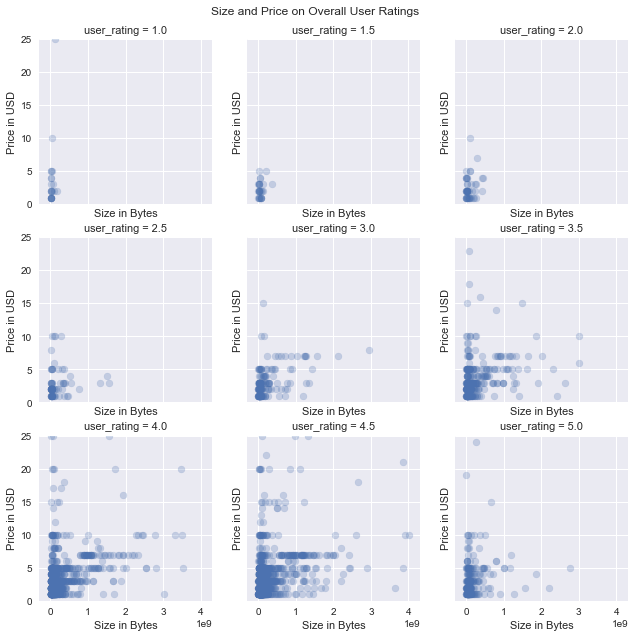

In [33]:
# lets plot price and size : two numeric variables across user_ratings , a categoric variable
g = sb.FacetGrid(data = temp_df, col = 'user_rating', col_wrap = 3);
g = g.map(plt.scatter, 'size_bytes','price', alpha = 0.25);
plt.ylim(0,25);
g.set(xlabel='Size in Bytes', ylabel='Price in USD');
plt.subplots_adjust(hspace=0.20, wspace=0.20)
plt.subplots_adjust(top =0.93) # to adjust the  main title posistion
g.fig.suptitle('Size and Price on Overall User Ratings');

Even though higher ratings apps have data with higher prices and bigger sizes, it cannot be true to say that these variables have a major impact on the user ratings. We saw a very weak relation depicted amongst these variables in the heatmap earlier. The co-relation amongst these three variables seems to be variant and cannot establish a strong linear one.  The only observation we can make is higher rating groups like 3.5, 4.0 and 4.5 have more data that are comparatively bigger in size and more costlier, then those with the lower ratings applications.

It seems the user rating are more impacted by the categoric variables.

Now lets look at how User ratings, Price and Cont rating co-relates.

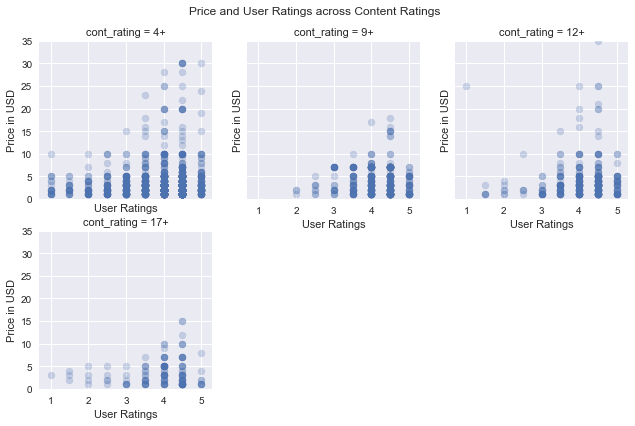

In [34]:
# lets plot price and user_ratings : two numeric variables across cont_rating , a categoric variable
# this is only for paid apps
# limiting the price to 35 USD
g = sb.FacetGrid(data = paid_apps, col = 'cont_rating', col_wrap = 3);
g = g.map(plt.scatter, 'user_rating','price', alpha = 0.25);
plt.ylim(0,35);
g.set(xlabel='User Ratings', ylabel='Price in USD');
plt.subplots_adjust(hspace=0.20, wspace=0.20)
plt.subplots_adjust(top =0.9) # to adjust the  main title posistion
g.fig.suptitle('Price and User Ratings across Content Ratings');

The user ratings are spread out across all the content rating groups. Some points we can see is the 4+ groups apps has major chunk of the data with ratings spreading out from 1 to 5 and prices ranging from low to high. 9+ groups have maximum price upto around 15 USD, also the user ratings are generally high.  Lastly, 17+ are generally low priced.
One point that I see is higher ratings apps are generally higher priced than those with lower ratings, even though not all of them.

Lets try for user_ratings , cont_ratings and Prime Genres. One numeric and two categoric variables.

In [35]:
# lets create a temp dataframe to create the heatmap
temp1_paid = paid_apps.groupby(['cont_rating','prime_genre']).mean()['user_rating']
print(temp1_paid)
temp1_free = free_apps.groupby(['cont_rating','prime_genre']).mean()['user_rating']
print(temp1_free)

cont_rating  prime_genre      
4+           Book                 4.228571
             Business             4.090909
             Catalogs                  NaN
             Education            3.967308
             Entertainment        3.584677
             Finance              4.156250
             Food & Drink         4.090909
             Games                4.095599
             Health & Fitness     4.186667
             Lifestyle            3.631579
             Medical              3.125000
             Music                4.200000
             Navigation           3.916667
             News                 3.750000
             Photo & Video        4.012658
             Productivity         4.121212
             Reference            4.314815
             Shopping             4.500000
             Social Networking    3.200000
             Sports               3.772727
             Travel               3.900000
             Utilities            3.586207
             Weather   

In [36]:
temp1_paid = temp1_paid.reset_index(name = 'average_rating')
print(temp1_paid)
temp1_free = temp1_free.reset_index(name = 'average_rating')
print(temp1_free)

   cont_rating        prime_genre  average_rating
0           4+               Book        4.228571
1           4+           Business        4.090909
2           4+           Catalogs             NaN
3           4+          Education        3.967308
4           4+      Entertainment        3.584677
5           4+            Finance        4.156250
6           4+       Food & Drink        4.090909
7           4+              Games        4.095599
8           4+   Health & Fitness        4.186667
9           4+          Lifestyle        3.631579
10          4+            Medical        3.125000
11          4+              Music        4.200000
12          4+         Navigation        3.916667
13          4+               News        3.750000
14          4+      Photo & Video        4.012658
15          4+       Productivity        4.121212
16          4+          Reference        4.314815
17          4+           Shopping        4.500000
18          4+  Social Networking        3.200000


In [37]:
temp1_paid = temp1_paid.pivot(index = 'prime_genre', columns = 'cont_rating', values = 'average_rating')
print(temp1_paid)
temp1_free = temp1_free.pivot(index = 'prime_genre', columns = 'cont_rating', values = 'average_rating')
print(temp1_free)

cont_rating              4+        9+       12+       17+
prime_genre                                              
Book               4.228571  5.000000  5.000000  4.666667
Business           4.090909       NaN       NaN  4.250000
Catalogs                NaN       NaN  4.500000       NaN
Education          3.967308  4.500000  4.833333  3.250000
Entertainment      3.584677  4.000000  3.659091  3.805556
Finance            4.156250       NaN       NaN       NaN
Food & Drink       4.090909       NaN  4.750000  3.875000
Games              4.095599  4.221398  4.203762  4.122807
Health & Fitness   4.186667  4.750000  4.333333  3.666667
Lifestyle          3.631579  2.250000  3.166667  4.250000
Medical            3.125000       NaN  3.818182       NaN
Music              4.200000       NaN  4.000000       NaN
Navigation         3.916667       NaN  4.500000  4.500000
News               3.750000  4.375000  4.000000  4.250000
Photo & Video      4.012658  4.333333  4.142857  4.250000
Productivity  

In [38]:
# lets fill the NaN with 0's assuming for this case, no average rating as 0 rating
temp1_paid.fillna(0, inplace = True)
temp1_free.fillna(0, inplace = True)

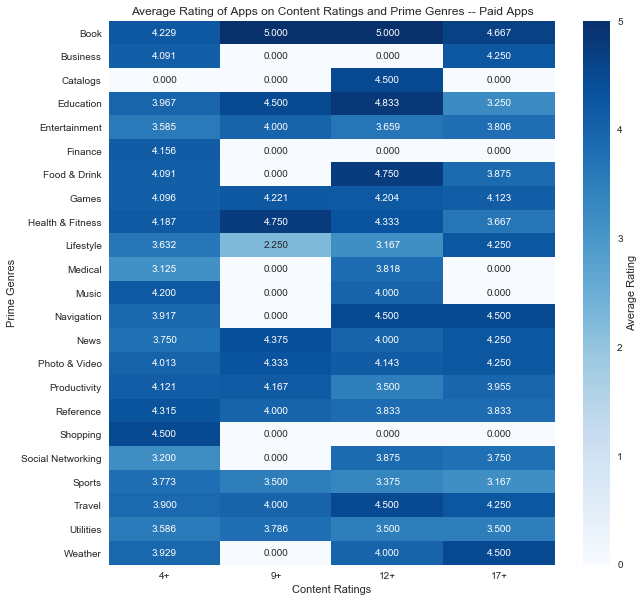

In [39]:
#creating the heatmap for paid apps
#https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/ -- changing colors heatmap
plt.figure(figsize = [10,10])
sb.heatmap(temp1_paid, annot = True, fmt = '.3f',cmap="Blues", cbar_kws = {'label':'Average Rating'});
plt.xlabel('Content Ratings');
plt.ylabel('Prime Genres');
plt.title('Average Rating of Apps on Content Ratings and Prime Genres -- Paid Apps');

As expected, here we can see a much clearer impacts on user ratings by the two categoric variables. 
So, for paid apps following observations can be made:
- For 4+ groups, shopping, book and references have a stronger relation with higher user ratings. 
- Book, Education, Health & Fitness, Games, Photo & Video and News are stronger in 9+ groups. 
- Books, Catalogs, Education, Food & Drink, Travel, Navigation, Games and Health & Fitness are strong. 
- While for 17+, Books, Business, Lifestyle, Navigation, News, Photo & Video, Travel and Weather are pretty strong.

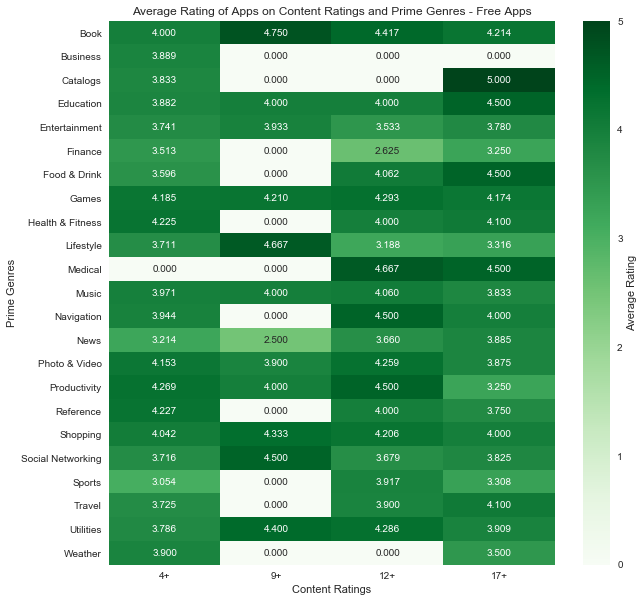

In [41]:
#creating the heatmap for free apps
#https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/ -- changing colors heatmap
plt.figure(figsize = [10,10])
sb.heatmap(temp1_free, annot = True, fmt = '.3f',cmap="Greens", cbar_kws = {'label':'Average Rating'});
plt.xlabel('Content Ratings');
plt.ylabel('Prime Genres');
plt.title('Average Rating of Apps on Content Ratings and Prime Genres - Free Apps');

Similarly for free apps:
- I can see Health & Fitness, Productivity, Reference forms a stronger relation with higher user ratings in 4+ groups.
- Books, Games, Lifestyle, Social Networking, Shopping and Utilities are the most popular in 9+ groups. 
- Book, Games, Medical, Navigation, Photo & Video, Productivity, Shopping and Utilities are for 12+ groups. 
- Lastly in 17+ groups, Book, Catalogs, Education, Food & Drink and Medical are the most popular ones.

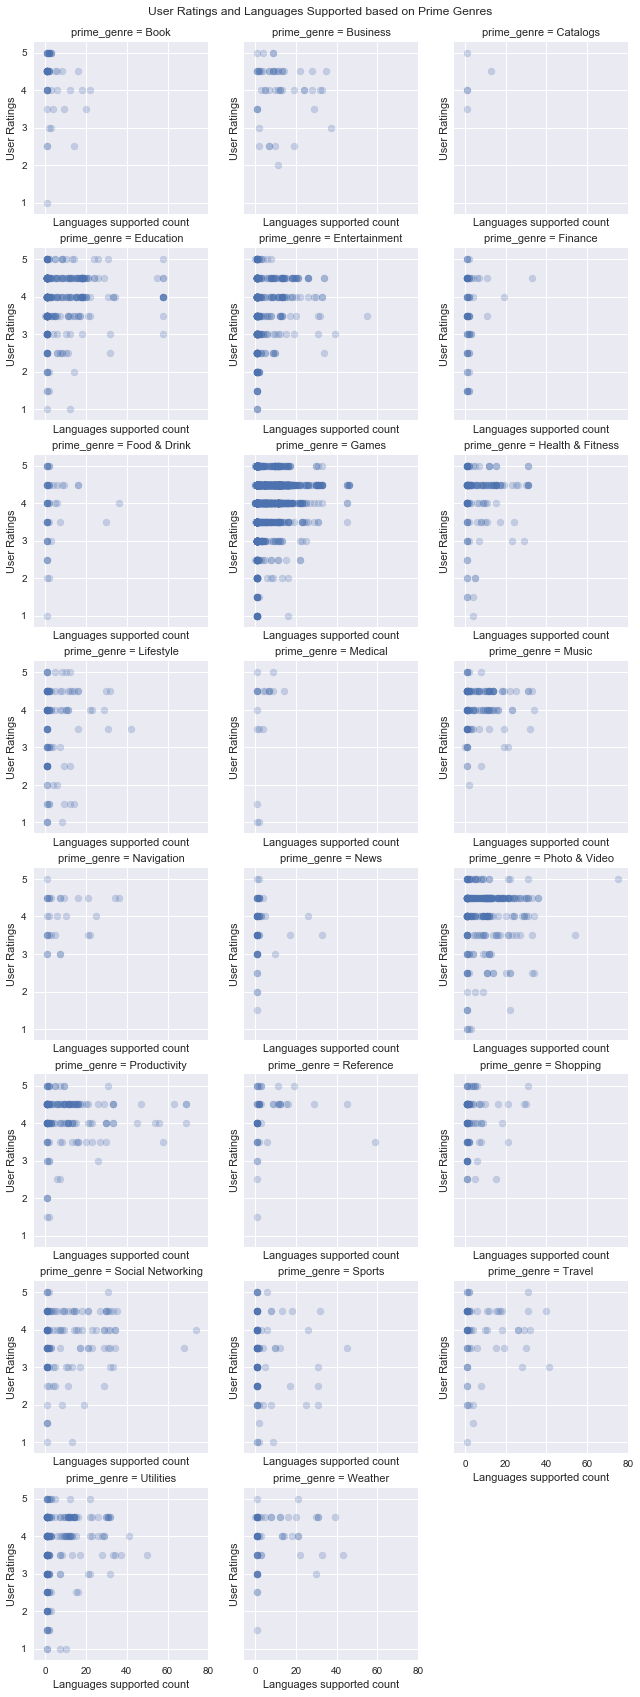

In [44]:
# user_ratings - lang_num - genres
g = sb.FacetGrid(data = appleStore, col = 'prime_genre', col_wrap = 3);
g = g.map(plt.scatter, 'lang_num','user_rating', alpha = 0.25);
#plt.ylim(0,50);
plt.subplots_adjust(hspace=0.20, wspace=0.20)
g.set(xlabel='Languages supported count', ylabel='User Ratings');
plt.subplots_adjust(top = 0.96) # to adjust the  main title position
g.fig.suptitle('User Ratings and Languages Supported based on Prime Genres');

Cannot really establish a co-relation since there are more genre types.

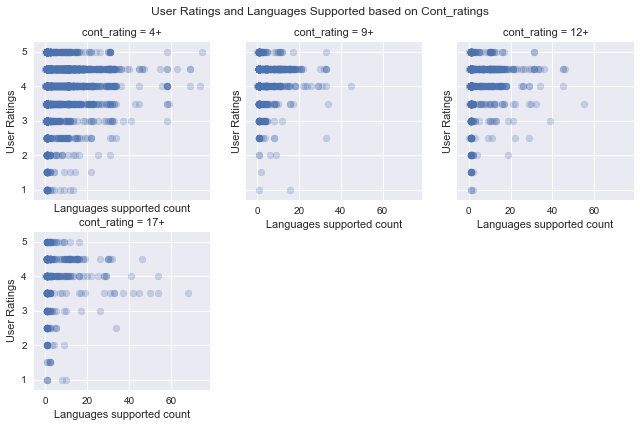

In [46]:
# user_ratings - lang_num - cont_rating
g = sb.FacetGrid(data = appleStore, col = 'cont_rating', col_wrap = 3);
g = g.map(plt.scatter, 'lang_num','user_rating', alpha = 0.25);
#plt.ylim(0,50);
plt.subplots_adjust(hspace=0.20, wspace=0.20)
g.set(xlabel='Languages supported count', ylabel='User Ratings');
plt.subplots_adjust(top = 0.9) # to adjust the  main title position
g.fig.suptitle('User Ratings and Languages Supported based on Cont_ratings');

For this also, the data are spread across all content rating group types. The only observation I could make is that ,apps that support higher number of languages have generally higher ratings irrespective of the content rating groups.

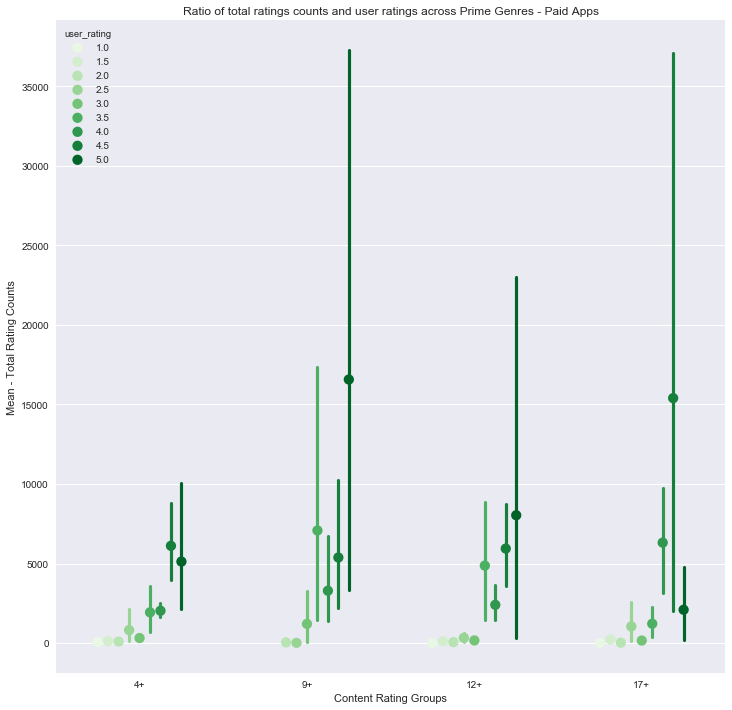

In [47]:
# Ratio of the total rating counts and the user ratings - Paid apps group.
fig = plt.figure(figsize = [12,12])
ax = sb.pointplot(data = paid_apps, x = 'cont_rating', y = 'rating_count_tot', hue = 'user_rating',
           palette = 'Greens', linestyles = '', dodge = 0.5)
plt.title('Ratio of total ratings counts and user ratings across Prime Genres - Paid Apps')
plt.ylabel('Mean - Total Rating Counts')
plt.xlabel('Content Rating Groups')
plt.show()

For Paid apps group, I can say that users on average gives higher ratings to apps around 3.5 to 4.5 as compared to the lower ratings since, in the above plot we can see, the mean of the total ratings counts for the higher ratings are generally higher than those of the lower ratings.

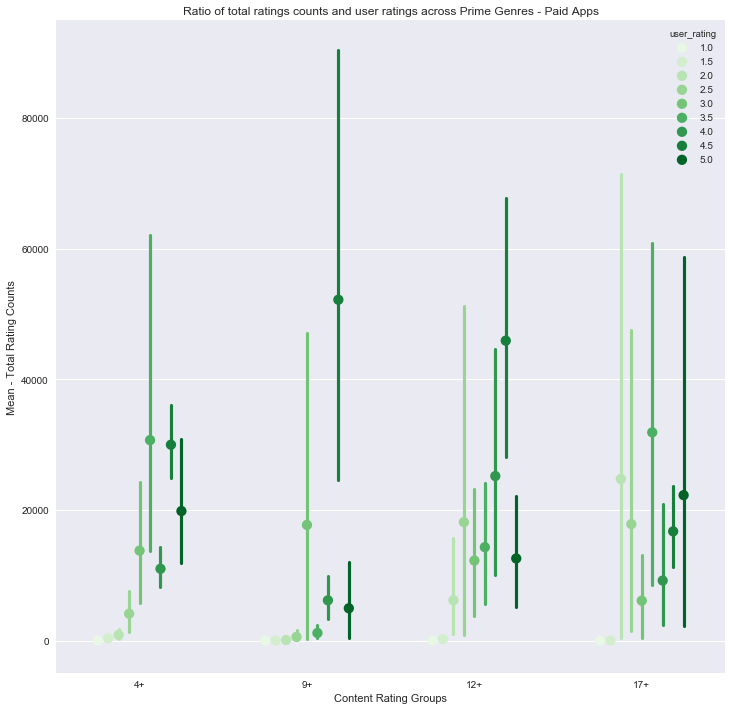

In [48]:
# Ratio of the total rating counts and the user ratings - Free apps group.
fig = plt.figure(figsize = [12,12])
ax = sb.pointplot(data = free_apps, x = 'cont_rating', y = 'rating_count_tot', hue = 'user_rating',
           palette = 'Greens', linestyles = '', dodge = 0.5)
plt.title('Ratio of total ratings counts and user ratings across Prime Genres - Paid Apps')
plt.ylabel('Mean - Total Rating Counts')
plt.xlabel('Content Rating Groups')
plt.show()

Unexpectedly for Free apps, users on average gives variant ratings across the apps of different content rating groups.
4+ groups gaves on average more ratings of 3.5, 4.5 and 5. 9+ groups on average gave more ratings of 3 and 4.5. 12+ with 2.5, 4 and 4.5 ratings and lastly 17+ groups gives 2, 2.5, 3.5, 4.5 and 5 user ratings on average.

### Some Notes and Conclusions based on Mutlivariate Exploration.

- My multivariate exploration of the impact on user ratings by price and size cannot really establish a conclusive corelation between these variables. I extended my investigation on the categoric variables and user ratings and its seems that user ratings have a strong relation with the Genres and the Content Rating variables. Different content rating groups on different genres shows a strong impact on how the users give the ratings to the applications. Not to forget, I can also see a somewhat linear correlation on the number of languages supported by the apps and the user ratings unless the number of languages supported is within 30.
- Paid apps user groups of all content rating categories gives ratings generally with higher values while Free apps users gives variant ratings on apps with different rating values across different content rating groups. 